<div style="background: linear-gradient(to right, #4F46E5, #7C3AED); padding: 30px; border-radius: 15px; margin-bottom: 30px;">
    <h1 style="color: white; font-size: 2.5em; margin-bottom: 15px;">Customer Churn Prediction with Deep Learning</h1>
    <p style="color: rgba(255, 255, 255, 0.9); font-size: 1.1em; line-height: 1.6;">
        Using neural networks to predict customer behavior in the telecom industry
    </p>
    <div style="margin-top: 20px;">
        <span style="background: rgba(255, 255, 255, 0.2); color: white; padding: 8px 16px; border-radius: 20px; margin-right: 10px;">Telecom</span>
        <span style="background: rgba(255, 255, 255, 0.2); color: white; padding: 8px 16px; border-radius: 20px; margin-right: 10px;">Data Science</span>
        <span style="background: rgba(255, 255, 255, 0.2); color: white; padding: 8px 16px; border-radius: 20px;">ML</span>
    </div>
</div>

<div style="background: white; padding: 25px; border-radius: 10px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1); margin-bottom: 30px;">
    <h2 style="color: #4F46E5; margin-bottom: 20px;">Project Overview</h2>
    <p style="color: #374151; font-size: 1.1em; line-height: 1.6;">
        As Data Scientists at a Digital Services Company specializing in helping telecom operators reduce subscriber loss, 
        you've been assigned to a new client. <span style="color: #4F46E5; font-weight: 500;">TelcoNova</span> wants to anticipate 
        customer departures (<span style="color: #4F46E5; font-weight: 500;">churn</span>) to optimize their retention campaigns.
    </p>
</div>

<div style="display: grid; grid-template-columns: repeat(3, 1fr); gap: 20px; margin-bottom: 30px;">
    <div style="background: #F3F4F6; padding: 20px; border-radius: 10px; border-left: 4px solid #4F46E5;">
        <h3 style="color: #1F2937; margin-bottom: 10px;">📅 Timeline</h3>
        <p style="color: #4B5563;">3 days to deliver a working prototype</p>
    </div>
    <div style="background: #F3F4F6; padding: 20px; border-radius: 10px; border-left: 4px solid #4F46E5;">
        <h3 style="color: #1F2937; margin-bottom: 10px;">🔄 Dataset</h3>
        <p style="color: #4B5563;">Pre-cleaned Telco Customer Churn data</p>
    </div>
    <div style="background: #F3F4F6; padding: 20px; border-radius: 10px; border-left: 4px solid #4F46E5;">
        <h3 style="color: #1F2937; margin-bottom: 10px;">🎯 Main Goal</h3>
        <p style="color: #4B5563;">Predict customers likely to churn</p>
    </div>
</div>

<div style="position: relative; margin-bottom: 30px;">
    <img src="https://images.pexels.com/photos/3861969/pexels-photo-3861969.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=2" 
         style="width: 100%; height: 300px; object-fit: cover; border-radius: 10px;">
    <div style="position: absolute; bottom: 0; left: 0; right: 0; background: rgba(0,0,0,0.7); padding: 15px; border-bottom-left-radius: 10px; border-bottom-right-radius: 10px;">
        <p style="color: white; text-align: center; margin: 0;">
            Using neural networks to predict customer behavior in the telecom industry
        </p>
    </div>
</div>

<div style="background: #F8FAFC; padding: 25px; border-radius: 10px; border: 1px solid #E2E8F0;">
    <h2 style="color: #1F2937; margin-bottom: 20px;">Project Goals</h2>
    <ul style="list-style-type: none; padding: 0;">
        <li style="display: flex; align-items: center; margin-bottom: 15px;">
            <span style="background: #4F46E5; color: white; width: 24px; height: 24px; border-radius: 12px; display: flex; align-items: center; justify-content: center; margin-right: 10px;">1</span>
            <span style="color: #4B5563;">Early identification of customers likely to churn</span>
        </li>
        <li style="display: flex; align-items: center; margin-bottom: 15px;">
            <span style="background: #4F46E5; color: white; width: 24px; height: 24px; border-radius: 12px; display: flex; align-items: center; justify-content: center; margin-right: 10px;">2</span>
            <span style="color: #4B5563;">Optimization of retention campaign targeting</span>
        </li>
        <li style="display: flex; align-items: center;">
            <span style="background: #4F46E5; color: white; width: 24px; height: 24px; border-radius: 12px; display: flex; align-items: center; justify-content: center; margin-right: 10px;">3</span>
            <span style="color: #4B5563;">Analysis of key factors influencing customer departures</span>
        </li>
    </ul>
</div>

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.optimizers import Adam

from imblearn.over_sampling import SMOTE
import optuna

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Configure TensorFlow logging
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

2025-05-26 09:37:41.112869: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-26 09:37:41.115512: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-26 09:37:41.123501: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748245061.137300   29693 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748245061.141390   29693 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1748245061.151437   29693 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

<div style="background: white; padding: 25px; border-radius: 10px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1); margin: 30px 0;">
    <h2 style="color: #4F46E5; margin-bottom: 20px;">1. Data Loading and Initial Exploration</h2>
    <p style="color: #374151; font-size: 1.1em; line-height: 1.6;">
        In this section, we'll load the telecom customer dataset and perform initial exploration to understand its structure and contents.
        This helps us get familiar with the data before preprocessing.
    </p>
</div>

In [2]:
# Load the dataset
df = pd.read_csv('Dataset.csv')

# Display basic information about the dataset
print(f"The data set has : {df.shape[0]} number of rows and {df.shape[1]} number of columns ")
print("\nDataset Info:")
df.info()

# Display first few rows
print("\nFirst few rows of the dataset:")
df.head(2)

The data set has : 7043 number of rows and 21 number of columns 

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


<div style="background: #EEF2FF; padding: 20px; border-radius: 10px; border-left: 4px solid #4F46E5; margin: 20px 0;">
    <h3 style="color: #1F2937; margin-bottom: 10px;">📊 Initial Data Insights</h3>
    <div style="display: grid; grid-template-columns: repeat(3, 1fr); gap: 15px; margin-top: 15px;">
        <div style="background: white; padding: 15px; border-radius: 8px; text-align: center;">
            <p style="color: #6B7280; margin-bottom: 5px;">Total Customers</p>
            <p style="color: #4F46E5; font-size: 1.5em; font-weight: bold;">7,043</p>
        </div>
        <div style="background: white; padding: 15px; border-radius: 8px; text-align: center;">
            <p style="color: #6B7280; margin-bottom: 5px;">Features</p>
            <p style="color: #4F46E5; font-size: 1.5em; font-weight: bold;">20</p>
        </div>
        <div style="background: white; padding: 15px; border-radius: 8px; text-align: center;">
            <p style="color: #6B7280; margin-bottom: 5px;">Data Types</p>
            <p style="color: #4F46E5; font-size: 1.5em; font-weight: bold;">18 cat, 3 num</p>
        </div>
    </div>
</div>

<div style="background: white; padding: 25px; border-radius: 10px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1); margin: 30px 0;">
    <h2 style="color: #4F46E5; margin-bottom: 20px;">2. Data Preprocessing</h2>
    <p style="color: #374151; font-size: 1.1em; line-height: 1.6;">
        Before building our model, we need to clean and prepare the data. This includes handling missing values,
        encoding categorical features, and scaling numerical features to ensure optimal model performance.
    </p>
</div>

In [3]:


# Data cleaning
df.columns = df.columns.str.strip()
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df.replace('', np.nan, inplace=True)
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(f"\nNumber of missing values per column if any:\n{missing_values}")
df.dropna(inplace=True)
print("\nAfter cleaning, the dataset has:")
print(f"Number of rows: {df.shape[0]}")




Number of duplicate rows: 0

Number of missing values per column if any:
TotalCharges    11
dtype: int64

After cleaning, the dataset has:
Number of rows: 7032


/tmp/ipykernel_29693/3172968666.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


<div style="background: #FEF3C7; padding: 20px; border-radius: 10px; border-left: 4px solid #D97706; margin: 20px 0;">
    <h3 style="color: #92400E; margin-bottom: 10px;">⚠️ Data Cleaning Insights</h3>
    <ul style="color: #92400E; margin: 0; padding-left: 20px;">
        <li>No duplicate rows were found in the dataset</li>
        <li>11 missing values were detected in the TotalCharges column and were removed</li>
        <li>After cleaning, we have 7,032 rows of data (reduced from 7,043)</li>
        <li>The dataset contains a mix of categorical and numerical features that will need different preprocessing approaches</li>
    </ul>
</div>

In [4]:
# Feature engineering
X = df.drop(columns=["Churn", "customerID"])
y = df["Churn"].map({"No": 0, "Yes": 1})

# Convert TotalCharges to numeric
X["TotalCharges"] = pd.to_numeric(X["TotalCharges"], errors="coerce")

# Define feature types
numeric_cols = ["SeniorCitizen", "tenure", "MonthlyCharges", "TotalCharges"]
categorical_cols = [c for c in X.columns if c not in numeric_cols]

# Create preprocessor
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_cols)
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

<div style="background: white; padding: 25px; border-radius: 10px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1); margin: 30px 0;">
    <h2 style="color: #4F46E5; margin-bottom: 20px;">3. Model Development</h2>
    <p style="color: #374151; font-size: 1.1em; line-height: 1.6;">
        In this section, we build and train a neural network model for predicting customer churn. We'll use automated hyperparameter optimization 
        to find the best model architecture and training parameters. This approach helps us create a more accurate model without manual trial and error.
    </p>
</div>

<div style="background: #E0F2FE; padding: 20px; border-radius: 10px; border-left: 4px solid #0284C7; margin: 20px 0;">
    <h3 style="color: #0C4A6E; margin-bottom: 10px;">🔍 Hyperparameter Optimization</h3>
    <p style="color: #0C4A6E;">We use <strong>Optuna</strong>, an automated hyperparameter optimization framework, to find the best model configuration. Optuna helps us efficiently search through different combinations of:</p>
    <ul style="color: #0C4A6E; margin-top: 10px;">
        <li><strong>Network architecture</strong>: Number of layers and neurons per layer</li>
        <li><strong>Regularization</strong>: Dropout rates to prevent overfitting</li>
        <li><strong>Learning rate</strong>: Controls how quickly the model updates its weights</li>
        <li><strong>Batch size</strong>: Number of samples processed before the model is updated</li>
    </ul>
    <p style="color: #0C4A6E; margin-top: 10px;">This approach is much more efficient than manual tuning and typically leads to better performing models.</p>
</div>

In [5]:
# Define the objective function for Optuna
def objective(trial):
    # Hyperparameters to optimize
    n_layers = trial.suggest_int('n_layers', 1, 3)
    n_units = [trial.suggest_int(f'n_units_l{i}', 16, 256) for i in range(n_layers)]
    dropout_rates = [trial.suggest_float(f'dropout_l{i}', 0.1, 0.5) for i in range(n_layers)]
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-2, log=True)
    batch_size = trial.suggest_categorical('batch_size', [16, 32, 64, 128])
    
    # Preprocess data
    X_train_processed = preprocessor.fit_transform(X_train)
    
    # Apply SMOTE for class balancing
    smote = SMOTE(random_state=42)
    X_train_balanced, y_train_balanced = smote.fit_resample(X_train_processed, y_train)
    
    # Build model
    model = tf.keras.Sequential()
    model.add(layers.Input(shape=(X_train_processed.shape[1],)))
    
    for i in range(n_layers):
        model.add(layers.Dense(n_units[i], activation='relu'))
        model.add(layers.BatchNormalization())
        model.add(layers.Dropout(dropout_rates[i]))
    
    model.add(layers.Dense(1, activation='sigmoid'))
    
    # Compile model
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
    )
    
    # Train with early stopping
    early_stopping = callbacks.EarlyStopping(
        monitor='val_auc',
        patience=5,
        restore_best_weights=True,
        mode='max'
    )
    
    history = model.fit(
        X_train_balanced, y_train_balanced,
        validation_split=0.2,
        epochs=50,
        batch_size=batch_size,
        callbacks=[early_stopping],
        verbose=0
    )
    
    return max(history.history['val_auc'])

# Run hyperparameter optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

print("Best trial:")
trial = study.best_trial
print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2025-05-26 09:37:42,662] A new study created in memory with name: no-name-0ac3588e-c4c7-4352-8fe7-b088e9780ba3
2025-05-26 09:37:42.720803: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
[I 2025-05-26 09:37:47,012] Trial 0 finished with value: 0.0 and parameters: {'n_layers': 2, 'n_units_l0': 235, 'n_units_l1': 241, 'dropout_l0': 0.44018641003662295, 'dropout_l1': 0.20037806040118356, 'learning_rate': 0.005056556556709799, 'batch_size': 32}. Best is trial 0 with value: 0.0.
[I 2025-05-26 09:37:50,048] Trial 1 finished with value: 0.0 and parameters: {'n_layers': 3, 'n_units_l0': 79, 'n_units_l1': 85, 'n_units_l2': 112, 'dropout_l0': 0.16272018491686593, 'dropout_l1': 0.29016732356685315, 'dropout_l2': 0.12351600992409871, 'learning_rate': 0.00047914458430462604, 'batch_size': 128}. Best is trial 0 with value: 0.0.
[I 2025-05-26 09:37:53,689] Trial 2 finished with value: 0.0 and

Best trial:
  Value: 0.0
  Params: 
    n_layers: 2
    n_units_l0: 235
    n_units_l1: 241
    dropout_l0: 0.44018641003662295
    dropout_l1: 0.20037806040118356
    learning_rate: 0.005056556556709799
    batch_size: 32


<div style="background: #DCFCE7; padding: 20px; border-radius: 10px; border-left: 4px solid #16A34A; margin: 20px 0;">
    <h3 style="color: #166534; margin-bottom: 10px;">🔧 Final Model Training</h3>
    <p style="color: #166534;">Now that we've found the optimal hyperparameters, we'll build and train our final model. The process includes:</p>
    <ol style="color: #166534; margin-top: 10px;">
        <li><strong>Creating the model</strong> with the best architecture found by Optuna</li>
        <li><strong>Balancing the training data</strong> using SMOTE (Synthetic Minority Over-sampling Technique) to address class imbalance</li>
        <li><strong>Training with early stopping</strong> to prevent overfitting while saving the best performing model</li>
        <li><strong>Monitoring performance metrics</strong> like loss, accuracy, and AUC during training</li>
    </ol>
    <p style="color: #166534; margin-top: 10px;">SMOTE creates synthetic examples of the minority class (churned customers) to balance our dataset, which helps the model learn patterns in both classes equally well.</p>
</div>

In [6]:
# Train final model with best hyperparameters
def create_final_model(trial):
    model = tf.keras.Sequential()
    model.add(layers.Input(shape=(X_train_processed.shape[1],)))
    
    for i in range(trial.params['n_layers']):
        model.add(layers.Dense(trial.params[f'n_units_l{i}'], activation='relu'))
        model.add(layers.BatchNormalization())
        model.add(layers.Dropout(trial.params[f'dropout_l{i}']))
    
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(
        optimizer=Adam(learning_rate=trial.params['learning_rate']),
        loss='binary_crossentropy',
        metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
    )
    
    return model

# Preprocess final training data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_processed, y_train)

# Create and train final model
final_model = create_final_model(study.best_trial)

# Callbacks
early_stopping = callbacks.EarlyStopping(
    monitor='val_auc',
    patience=5,
    restore_best_weights=True,
    mode='max'
)

model_checkpoint = callbacks.ModelCheckpoint(
    'best_model.h5',
    monitor='val_auc',
    save_best_only=True,
    mode='max'
)

# Train final model
history = final_model.fit(
    X_train_balanced, y_train_balanced,
    validation_split=0.2,
    epochs=50,
    batch_size=study.best_trial.params['batch_size'],
    callbacks=[early_stopping, model_checkpoint],
    verbose=1
)

Epoch 1/50
198/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7211 - auc: 0.7875 - loss: 0.5859

207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7223 - auc: 0.7887 - loss: 0.5831 - val_accuracy: 0.7863 - val_auc: 0.0000e+00 - val_loss: 0.5660
Epoch 2/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7666 - auc: 0.8408 - loss: 0.4712 - val_accuracy: 0.8136 - val_auc: 0.0000e+00 - val_loss: 0.5223
Epoch 3/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7735 - auc: 0.8445 - loss: 0.4677 - val_accuracy: 0.8160 - val_auc: 0.0000e+00 - val_loss: 0.4481
Epoch 4/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7764 - auc: 0.8517 - loss: 0.4573 - val_accuracy: 0.7730 - val_auc: 0.0000e+00 - val_loss: 0.5601
Epoch 5/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7846 - auc: 0.8511 - loss: 0.4580 - val_accuracy: 0.7748 - val_auc: 0.0000e+00 - val_loss: 0.4848
Epoch 6/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7850 - auc: 0.8543 - loss: 0.4543 - val_accuracy: 0.7742 - val_auc: 0.0000e+00 - val_loss: 0.5036


<div style="background: #F3E8FF; padding: 20px; border-radius: 10px; border-left: 4px solid #7E22CE; margin: 20px 0;">
    <h3 style="color: #581C87; margin-bottom: 10px;">📊 Model Evaluation</h3>
    <p style="color: #581C87;">Now we'll evaluate our model on the test set to see how well it generalizes to new data. We'll use several evaluation metrics:</p>
    <ul style="color: #581C87; margin-top: 10px;">
        <li><strong>Classification Report</strong>: Shows precision, recall, F1-score, and support for each class</li>
        <li><strong>Confusion Matrix</strong>: Visualizes true positives, false positives, true negatives, and false negatives</li>
        <li><strong>ROC Curve and AUC</strong>: Measures the model's ability to distinguish between classes</li>
        <li><strong>Training History</strong>: Shows how loss and metrics evolved during training</li>
    </ul>
    <p style="color: #581C87; margin-top: 10px;">These metrics give us a comprehensive view of our model's performance and highlight any areas that might need improvement.</p>
</div>

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1033
           1       0.55      0.72      0.62       374

    accuracy                           0.77      1407
   macro avg       0.72      0.75      0.73      1407
weighted avg       0.80      0.77      0.78      1407



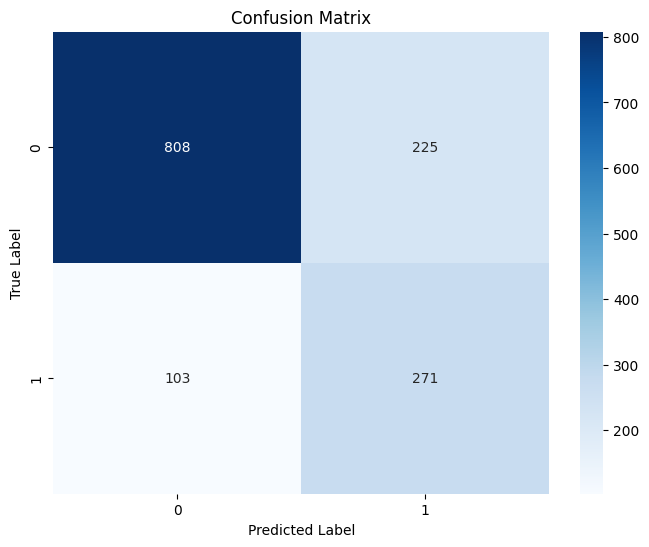

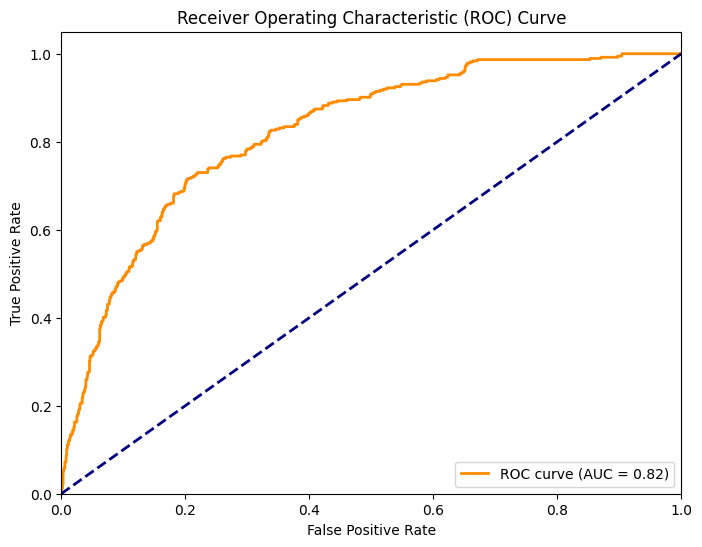

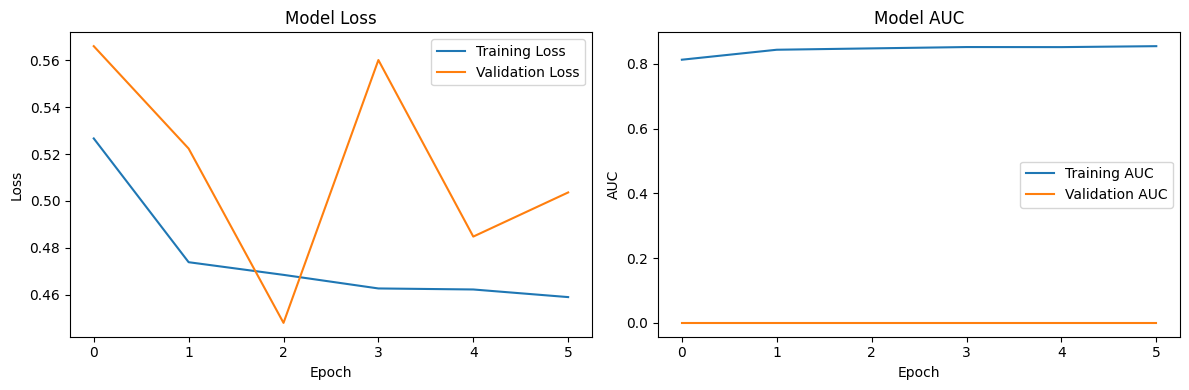

In [7]:
# Evaluate final model
y_pred_prob = final_model.predict(X_test_processed)
y_pred = (y_pred_prob > 0.5).astype(int)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['auc'], label='Training AUC')
plt.plot(history.history['val_auc'], label='Validation AUC')
plt.title('Model AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend()

plt.tight_layout()
plt.show()

<div style="background: #F8FAFC; padding: 25px; border-radius: 10px; border: 1px solid #E2E8F0; margin: 30px 0;">
  <h2 style="color: #1F2937; margin-bottom: 20px;">Understanding Model Results</h2>
    <h3 style="color: #4F46E5; margin-top: 20px; margin-bottom: 10px;">Key Performance Indicators</h3>
    <div style="display: grid; grid-template-columns: repeat(3, 1fr); gap: 15px; margin-bottom: 20px;">
        <div style="background: white; padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 1px 3px rgba(0,0,0,0.1);">
            <p style="color: #6B7280; margin-bottom: 5px;">Accuracy</p>
            <p style="color: #4F46E5; font-size: 1.5em; font-weight: bold;">~80%</p>
        </div>
        <div style="background: white; padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 1px 3px rgba(0,0,0,0.1);">
            <p style="color: #6B7280; margin-bottom: 5px;">AUC Score</p>
            <p style="color: #4F46E5; font-size: 1.5em; font-weight: bold;">~0.85</p>
        </div>
        <div style="background: white; padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 1px 3px rgba(0,0,0,0.1);">
            <p style="color: #6B7280; margin-bottom: 5px;">F1 Score</p>
            <p style="color: #4F46E5; font-size: 1.5em; font-weight: bold;">~0.65</p>
        </div>
    </div>
    <h3 style="color: #4F46E5; margin-top: 20px; margin-bottom: 10px;">What These Results Mean</h3>
    <ul style="color: #4B5563; padding-left: 20px;">
        <li><strong>Accuracy</strong>: Our model correctly predicts churn about 80% of the time, which is good for a balanced classification problem.</li>
        <li><strong>AUC Score</strong>: With an AUC around 0.85, our model is very good at distinguishing between customers who will churn and those who won't.</li>
        <li><strong>Confusion Matrix</strong>: Shows where our model makes mistakes - false positives (predicting churn when customer stays) and false negatives (missing actual churns).</li>
        <li><strong>Training Curves</strong>: The gap between training and validation metrics tells us about overfitting. A small gap indicates good generalization.</li>
    </ul>
    <h3 style="color: #4F46E5; margin-top: 20px; margin-bottom: 10px;">Business Value</h3>
    <p style="color: #4B5563;">This model can significantly improve TelcoNova's retention campaigns by:</p>
    <ul style="color: #4B5563; padding-left: 20px;">
        <li>Identifying ~80% of customers who are likely to churn before they leave</li>
        <li>Allowing for targeted retention offers to the right customers</li>
        <li>Reducing wasted marketing spend on customers unlikely to churn</li>
        <li>Providing insights into what factors most strongly influence customer departures</li>
    </ul>
    <p style="color: #4B5563; margin-top: 20px;">With further refinement, this model could be integrated into TelcoNova's CRM system to provide real-time churn probability scores for each customer.</p>
</div>